In [1]:
%pylab inline
import sys
sys.path.append("../../../bieberpy/py/")
from bieberpy import SHTrace

Populating the interactive namespace from numpy and matplotlib


In [2]:
data=[(fname,SHTrace("../../../RFI_data/"+fname+'.bbr'),clr) for fname,clr in [('basin_yagi_afternoon','r'),('basin_yagi_evening','b'),('basin_yagi_afternoon-night_highrange','k'),('basin_dipole_evening','g')]]

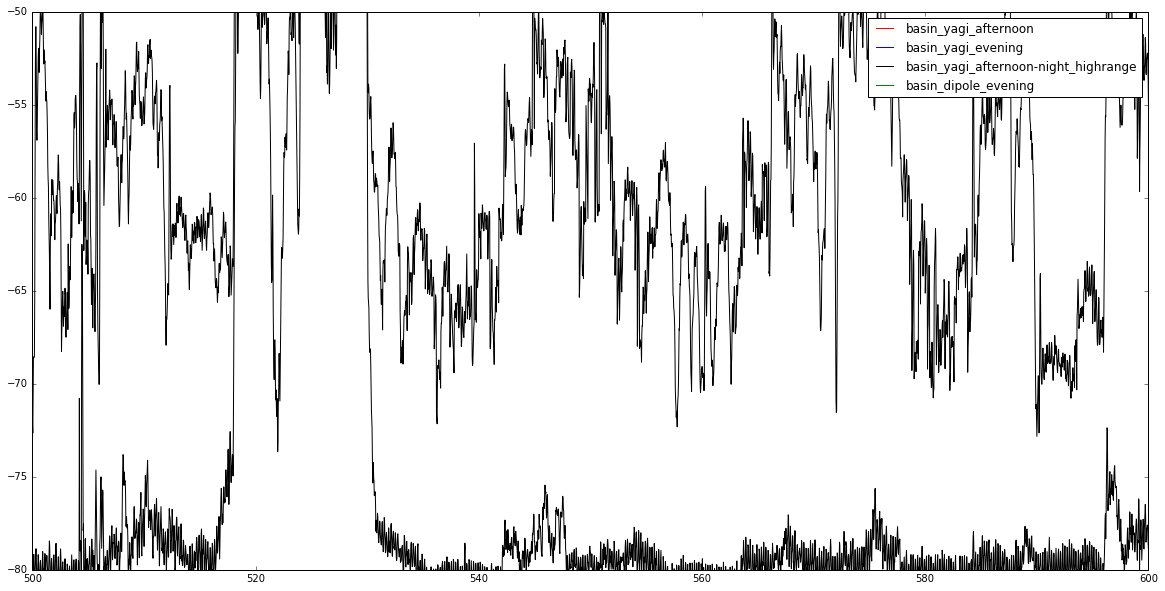

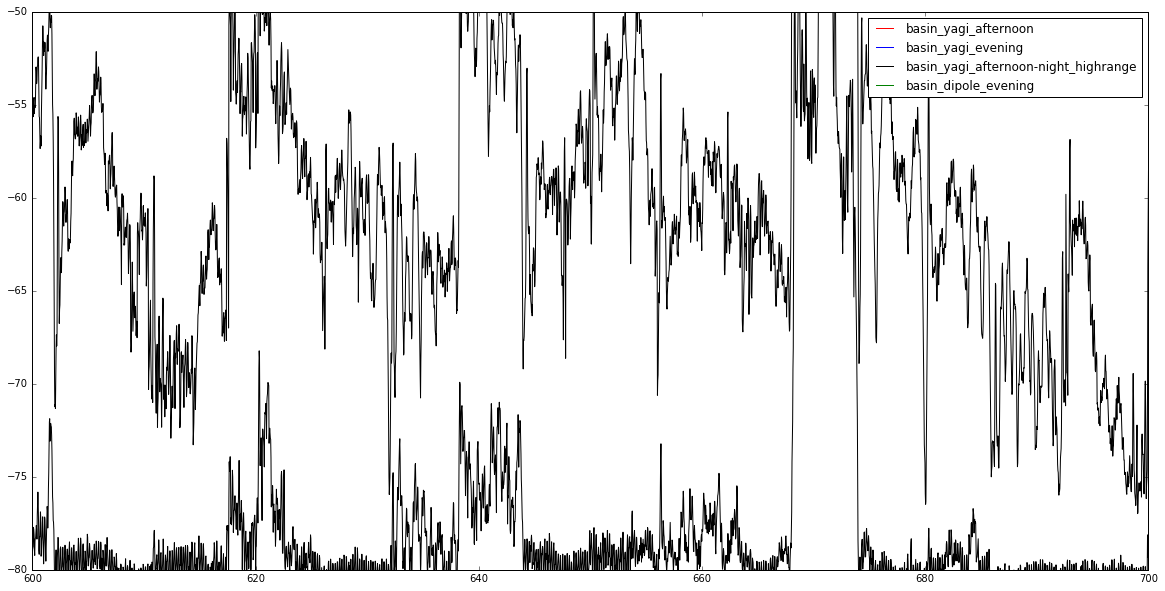

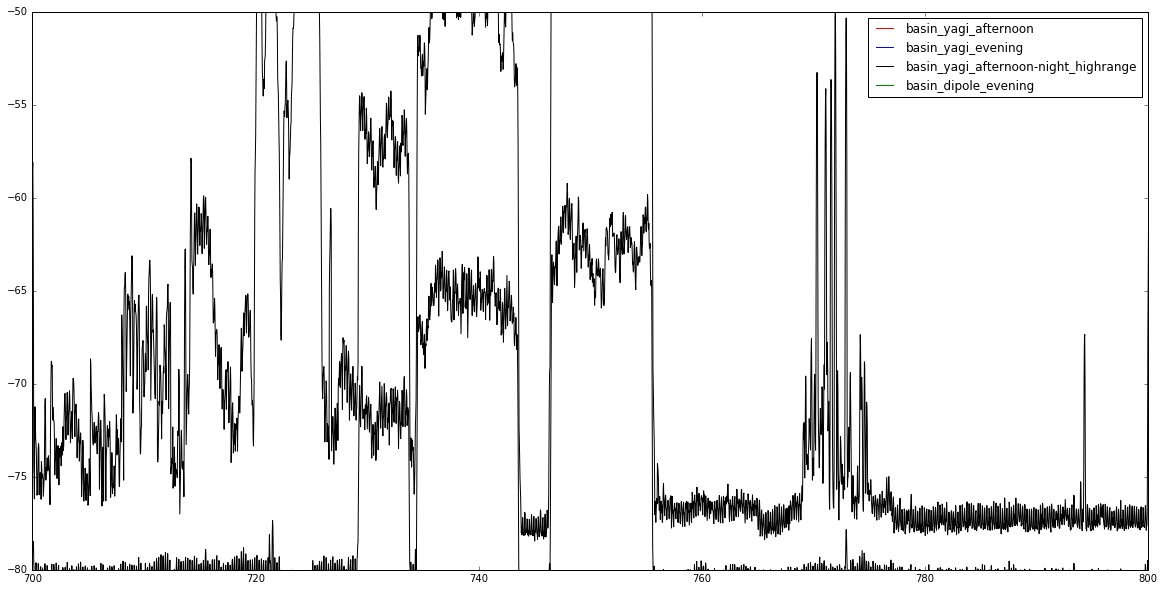

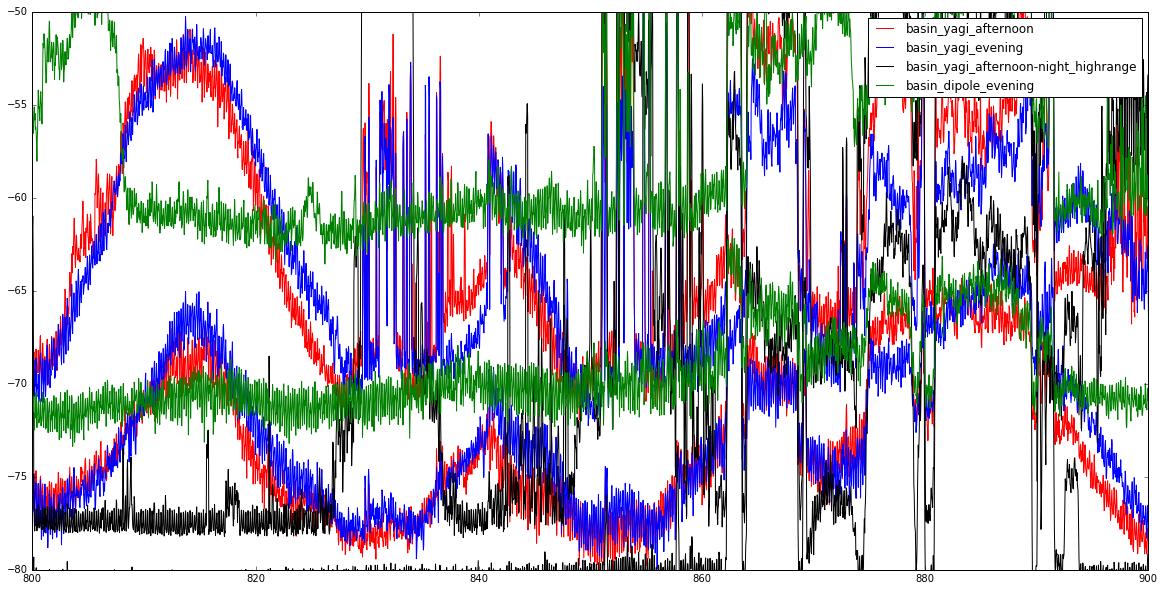

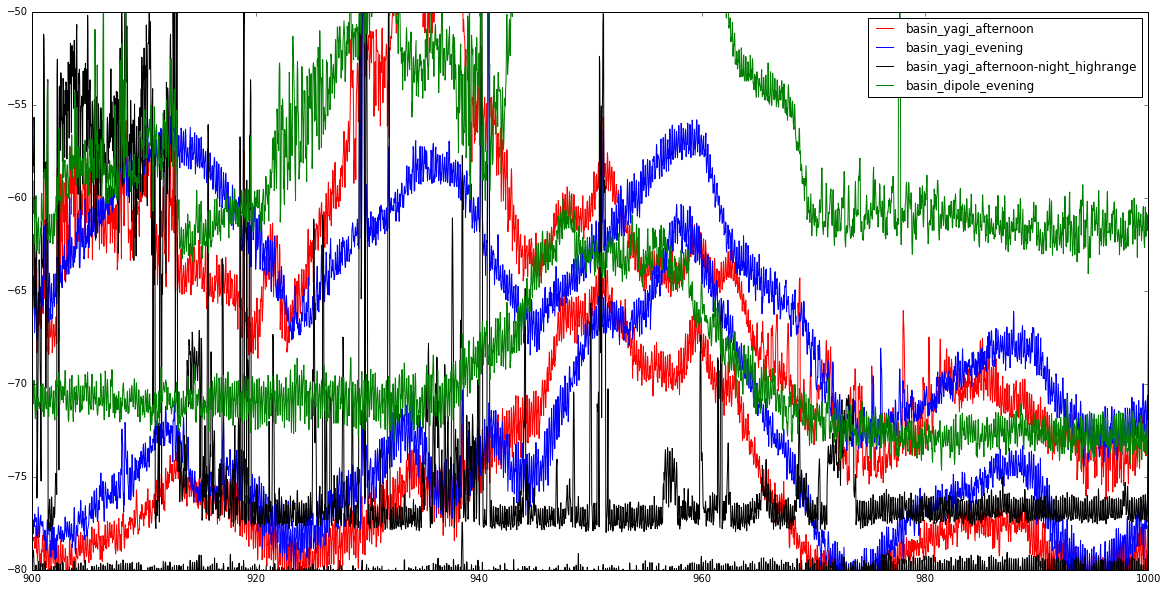

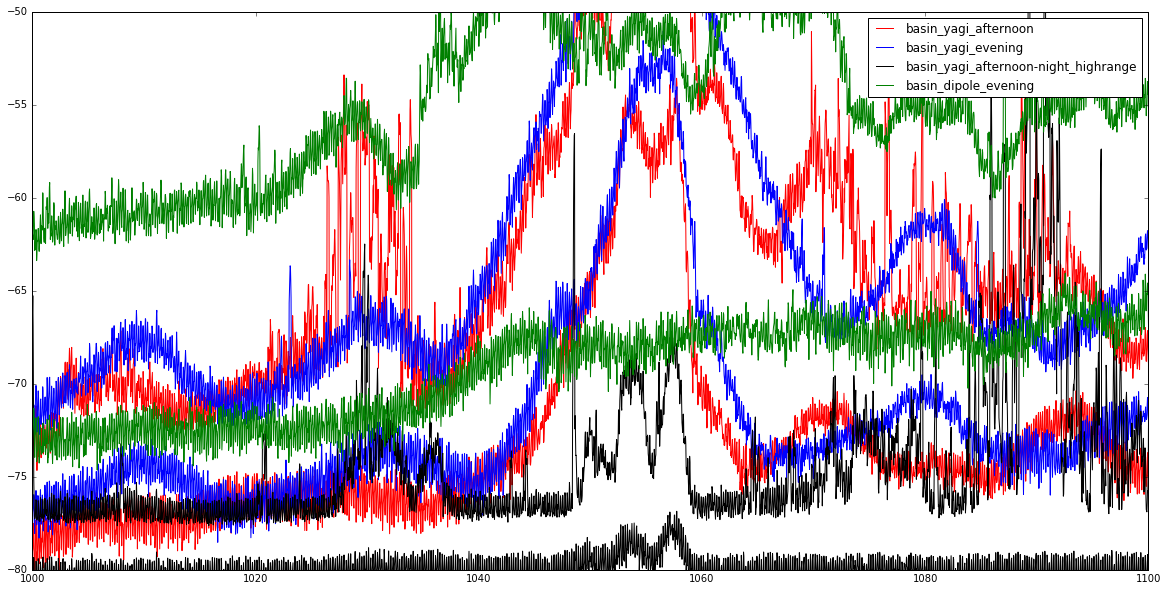

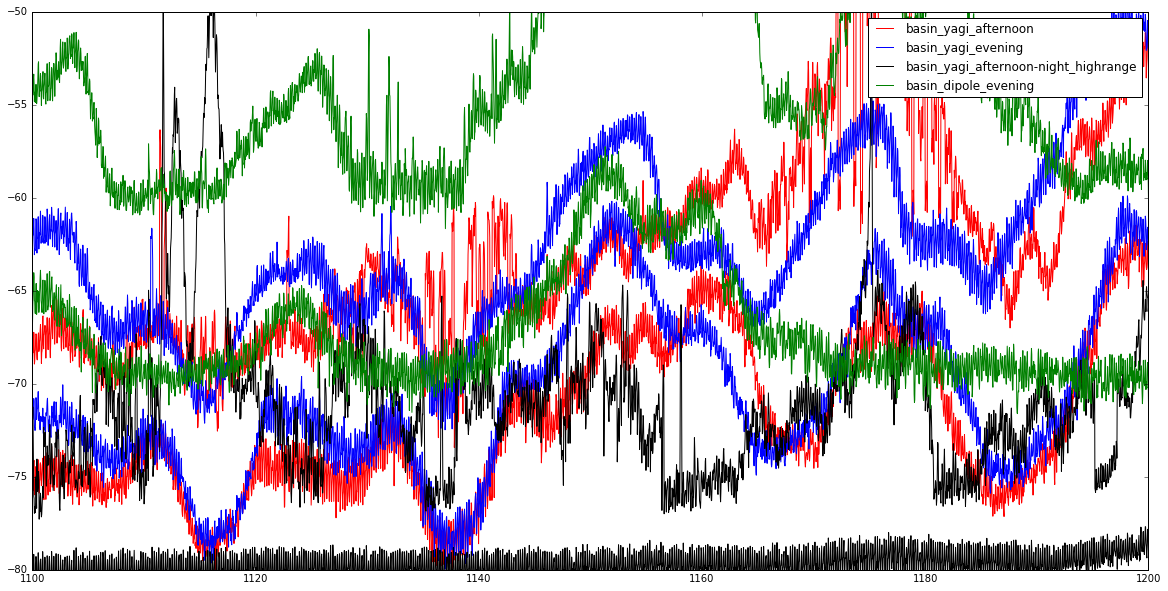

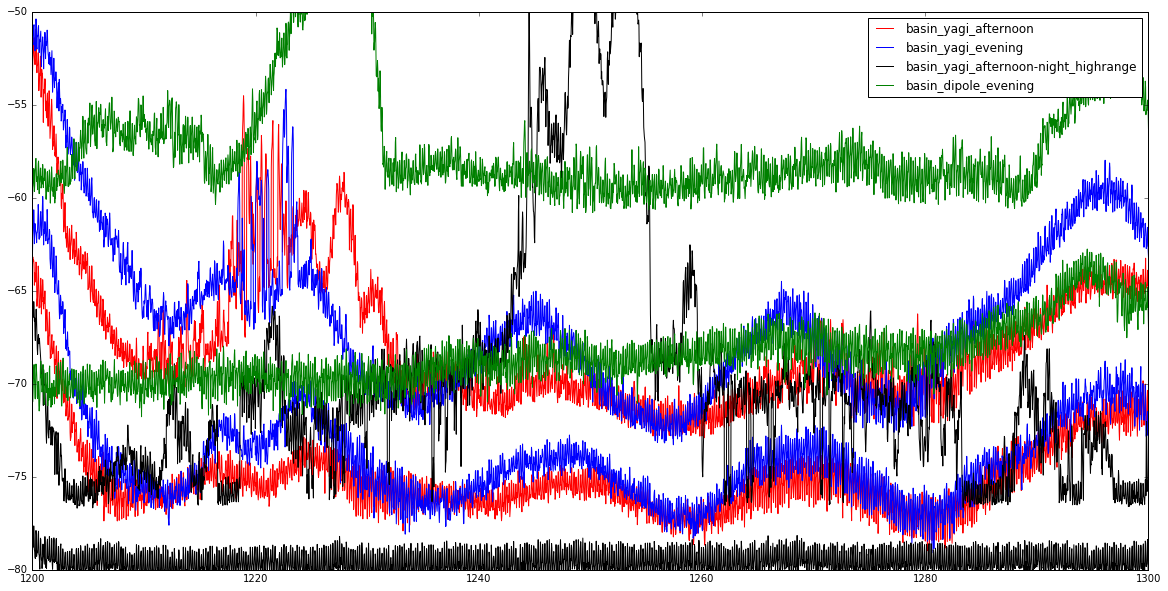

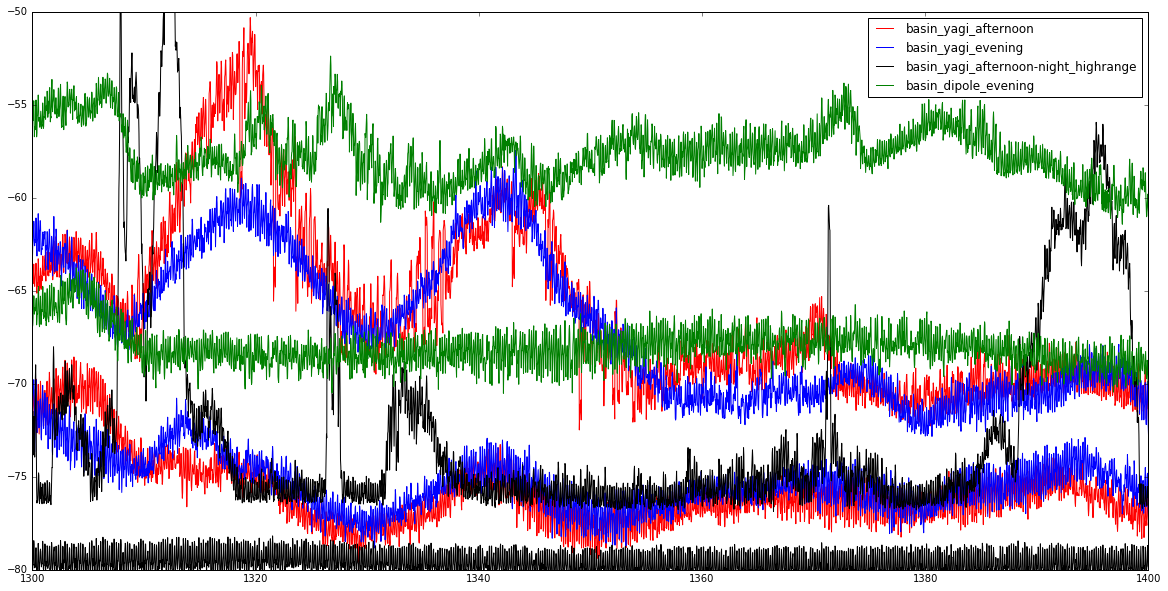

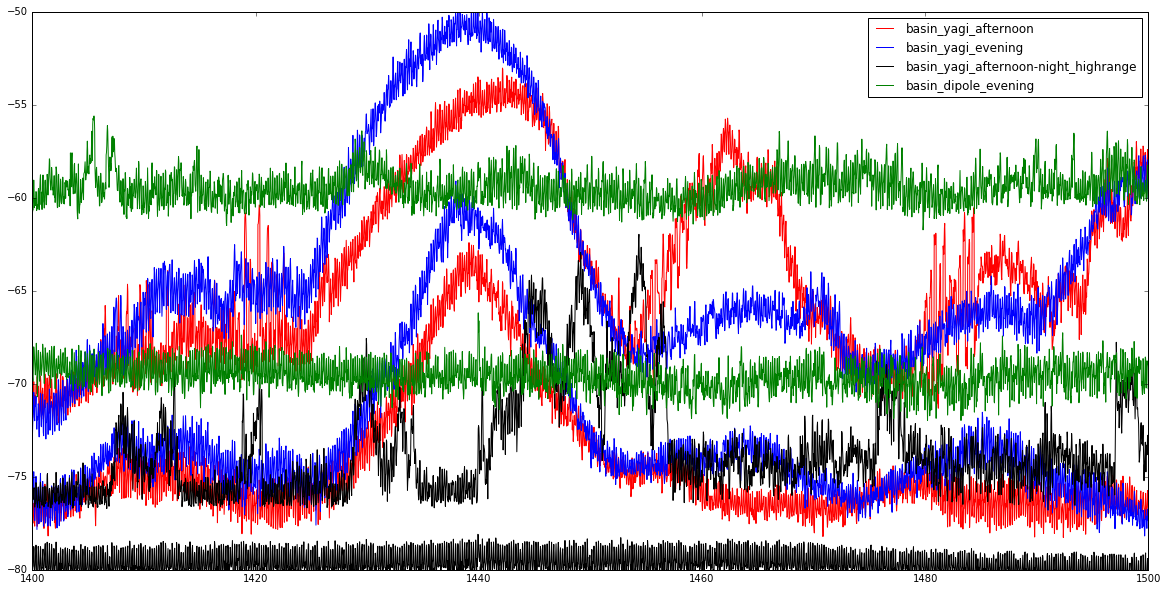

In [3]:

for fmin in range(500,1500,100):
    figure(figsize=(20,10))
    for n,d,clr in data:
        fr,ti,da=d.getDataCube()
        sig1=da.min(axis=0)
        sig2=da.max(axis=0)
        #err=sqrt((da*da).mean(axis=0)-sig*sig)
        plot(fr,sig1,label=n,color=clr)
        plot(fr,sig2,color=clr)
        
    legend()
    pylab.ylim(-80,-50)
    xlim(fmin,fmin+100)
    

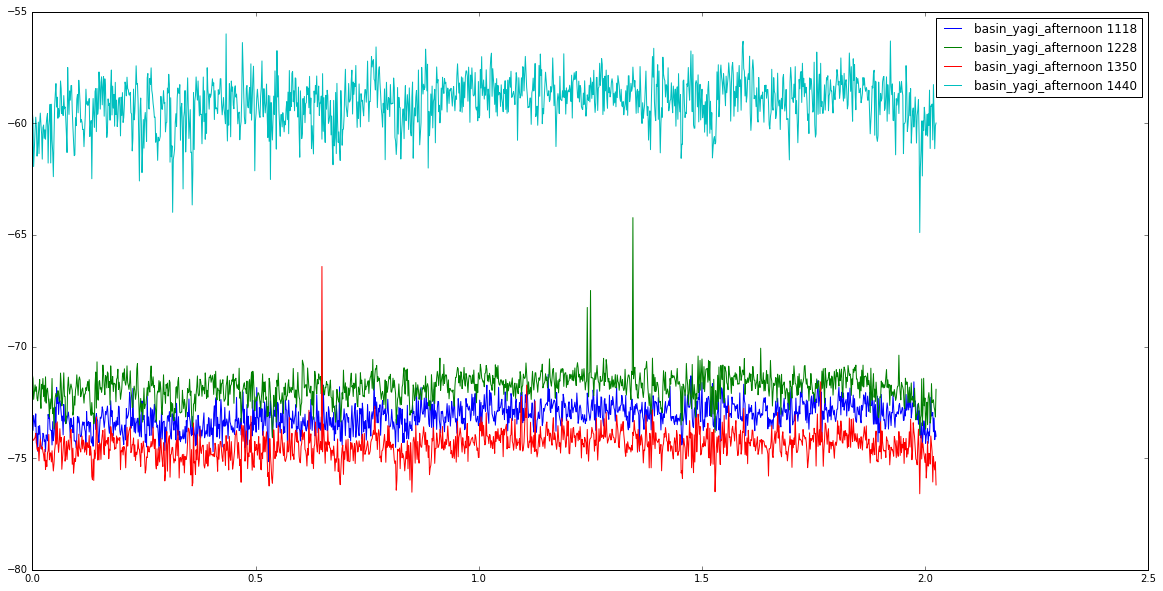

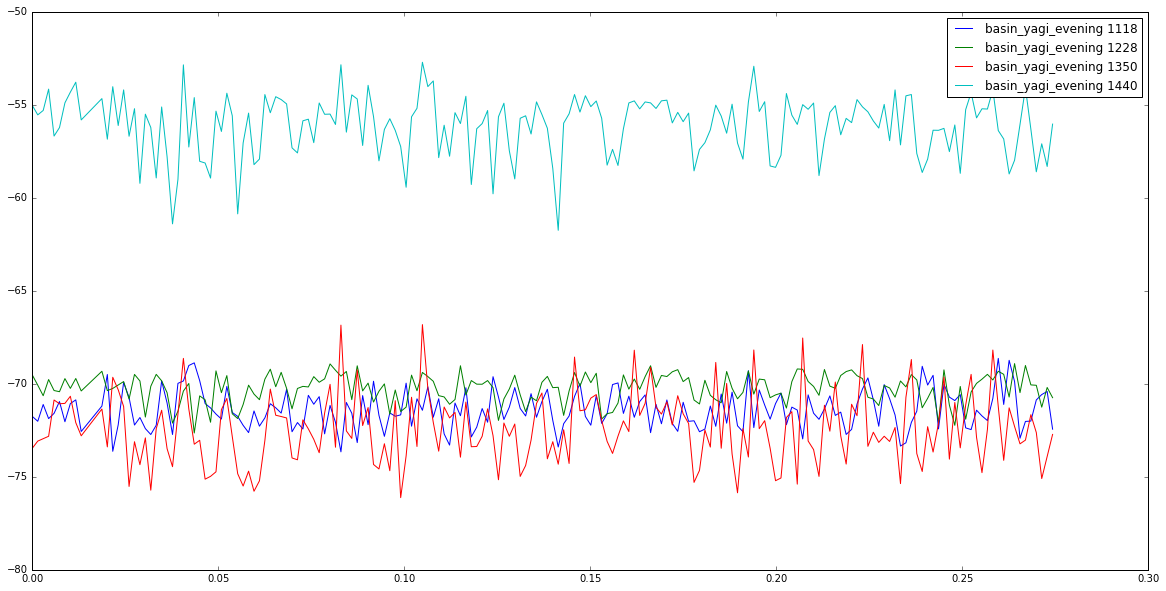

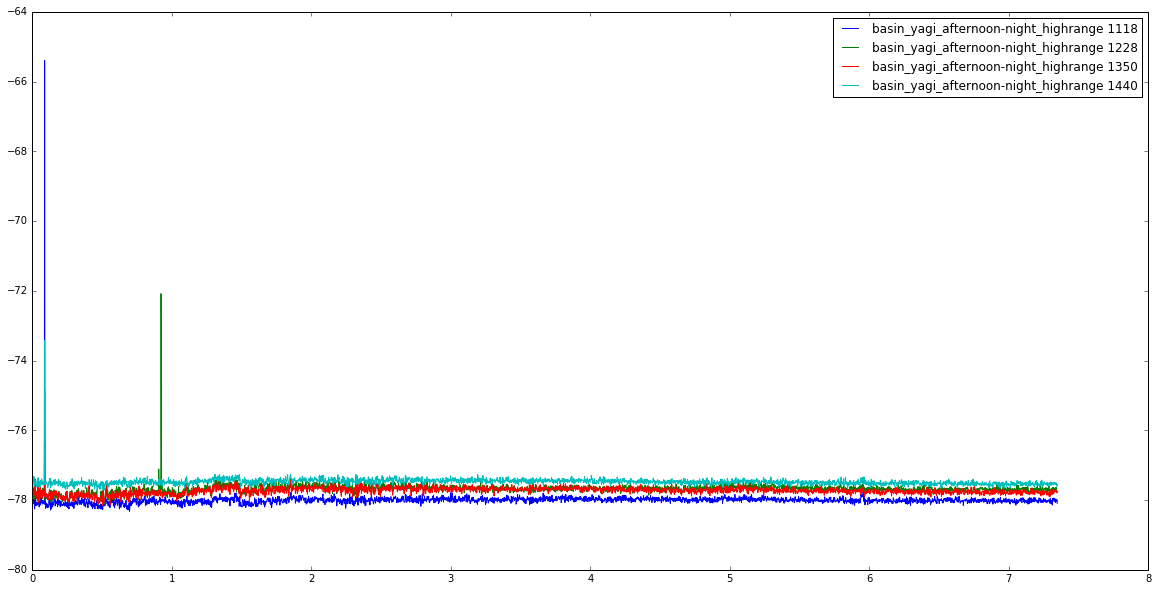

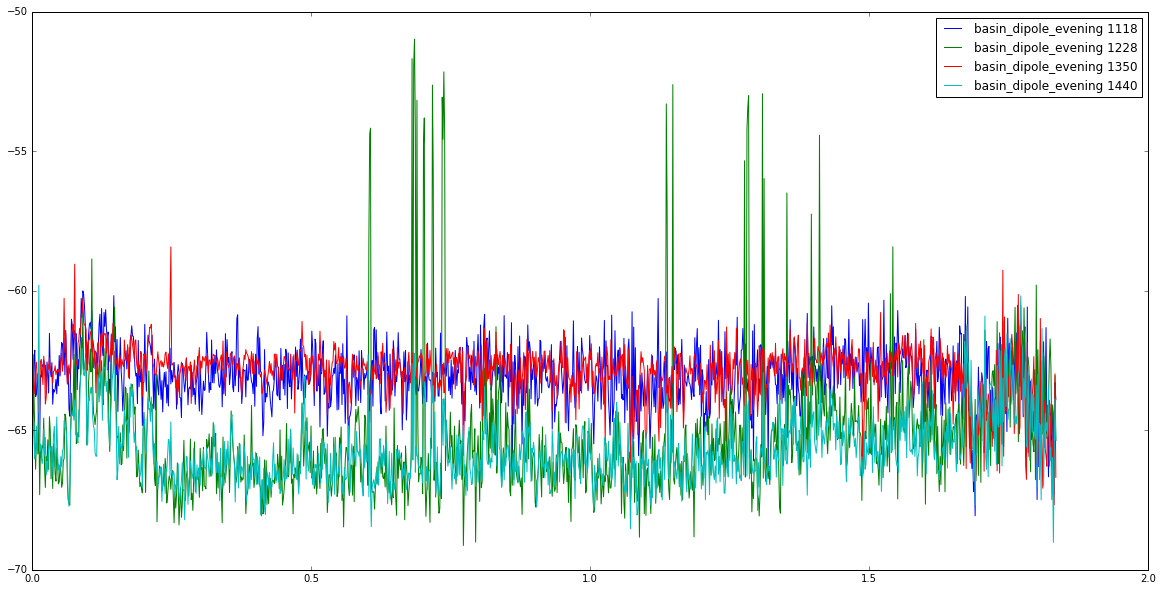

In [6]:
## Let's try to see if we can see galaxy crossing
figure(figsize=(20,10))
#freqlist=[1020,1115,1220,1260,1380,1420]
freqlist=[1118,1228,1350,1440]
for n,d,clr in data:
    figure(figsize=(20,10))
    for cf in freqlist:
        fr,ti,da=d.getDataCube(min_freq=cf-5,max_freq=cf+5,freq_avg=1000,time_avg=1)
        plot((ti-ti[0])/3600/1e3,da[:,0],label=n+' '+str(cf))
    legend()


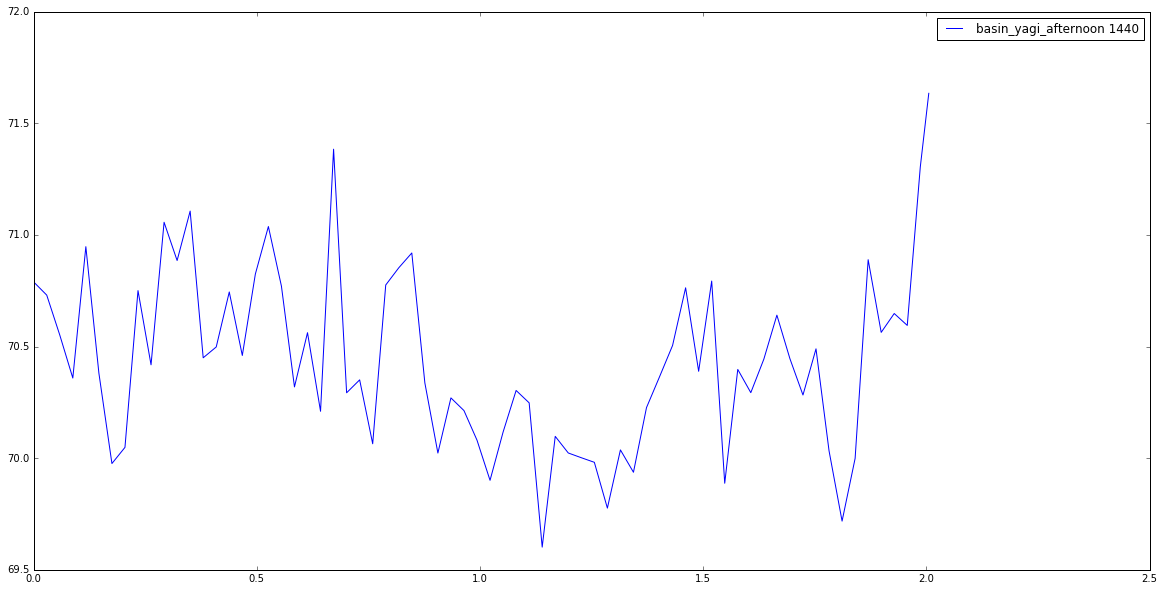

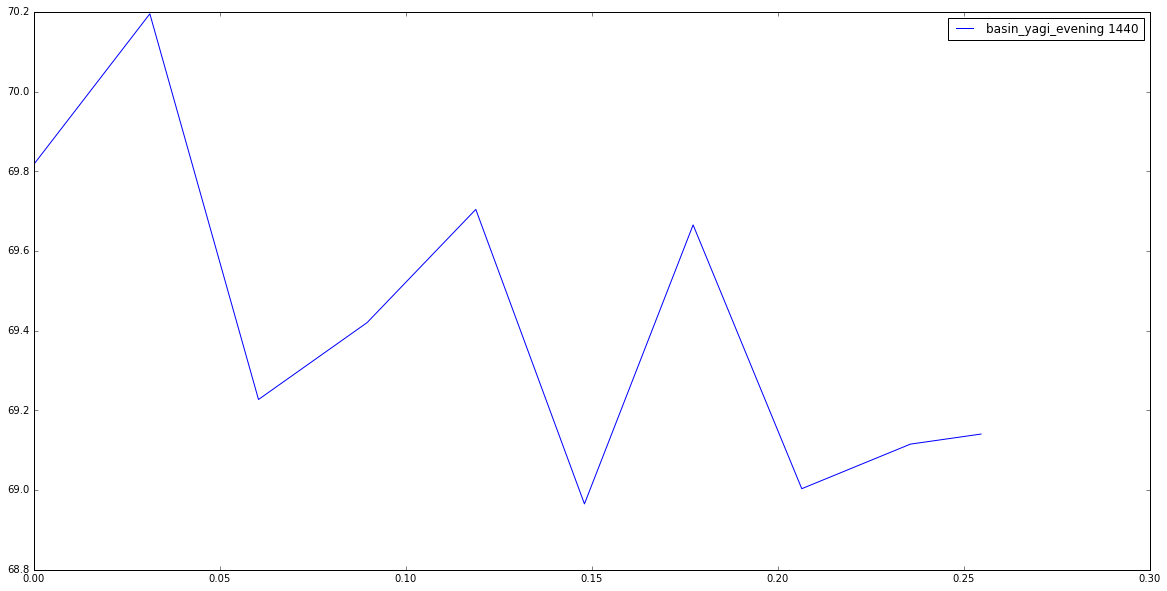

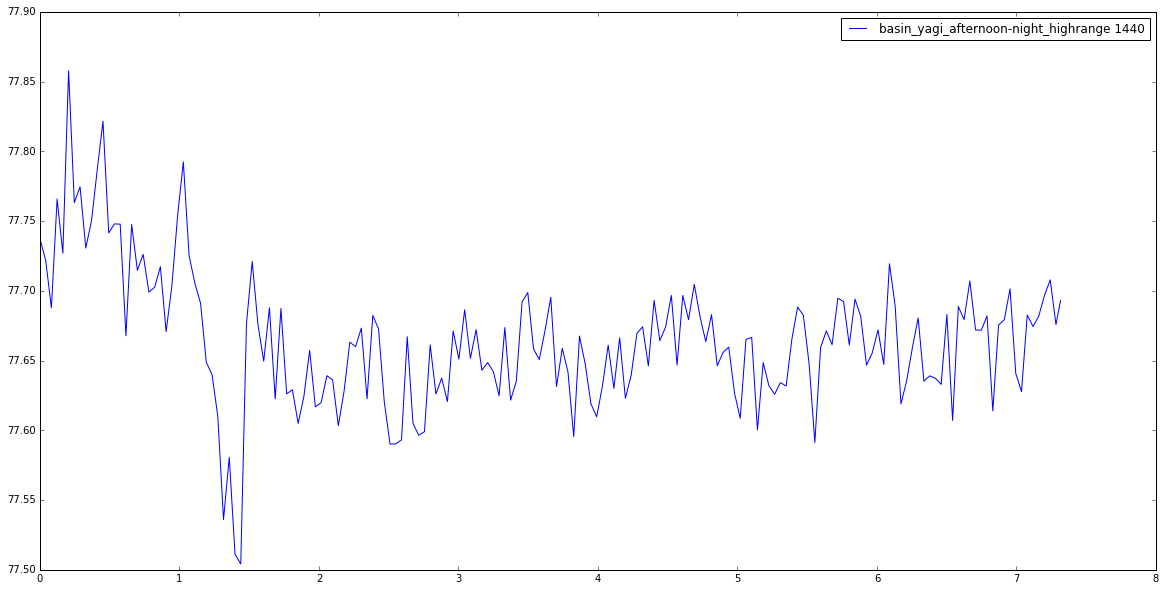

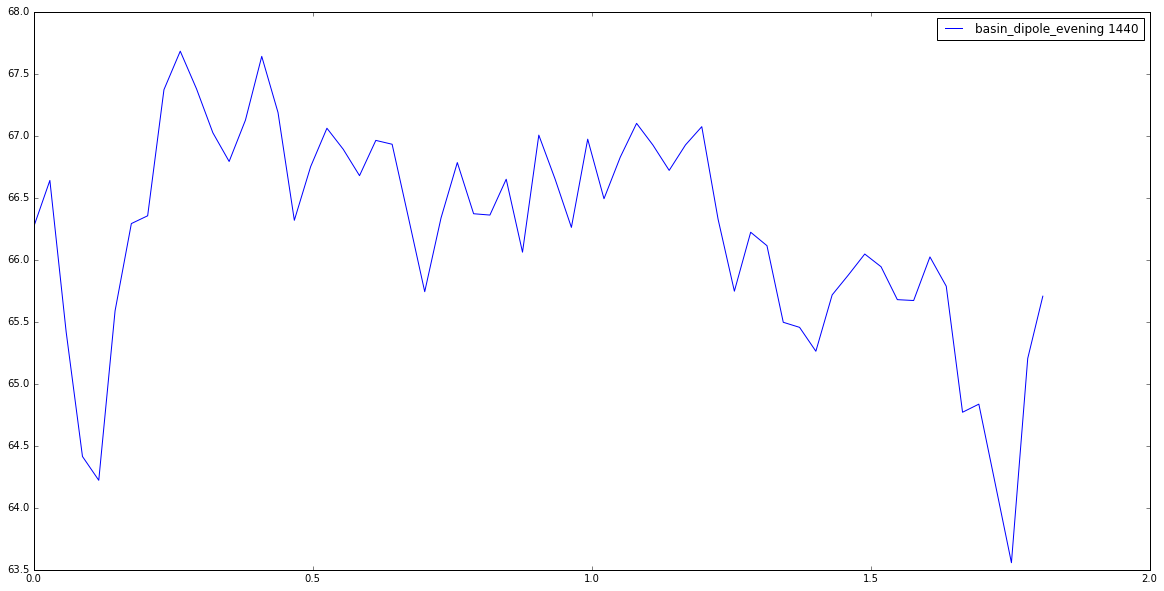

In [5]:
## CUOLD WE SEE GALAXY in 21CM transiting?

## Let's try to see if we can see galaxy crossing
figure(figsize=(20,10))
for n,d,clr in data:
    figure(figsize=(20,10))
    fr,ti,da=d.getDataCube(min_freq=1418,max_freq=1422,freq_avg=1000,time_avg=20)
    fr,ti,dam=d.getDataCube(min_freq=1412,max_freq=1418,freq_avg=1000,time_avg=20)
    fr,ti,dap=d.getDataCube(min_freq=1422,max_freq=1428,freq_avg=1000,time_avg=20)
    da-=dam
    da-=dap
    plot((ti-ti[0])/3600/1e3,da[:,0],label=n+' '+str(cf))
    legend()